# Convolutional Neural Networks

# Importar Librerías

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import tensorflow as tf
import keras
from keras.utils import to_categorical
from tensorflow.python.keras.layers import Input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

2024-08-04 18:13:29.282302: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-04 18:13:29.291387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 18:13:29.302193: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 18:13:29.305303: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 18:13:29.313204: I tensorflow/core/platform/cpu_feature_guar

# Cargar set de Imágenes

In [ ]:
dirname = os.path.join(os.getcwd(), 'sportimages')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  /home/luisjdominguezp/Downloads/sportimages/
/home/luisjdominguezp/Downloads/sportimages/natacion 1
/home/luisjdominguezp/Downloads/sportimages/americano 5172
/home/luisjdominguezp/Downloads/sportimages/tenis 9348
/home/luisjdominguezp/Downloads/sportimages/beisball 8937
/home/luisjdominguezp/Downloads/sportimages/f1 7752
/home/luisjdominguezp/Downloads/sportimages/ciclismo 5053
/home/luisjdominguezp/Downloads/sportimages/sportimages/natacion 7533
/home/luisjdominguezp/Downloads/sportimages/sportimages/americano 5172
/home/luisjdominguezp/Downloads/sportimages/sportimages/tenis 9348
/home/luisjdominguezp/Downloads/sportimages/sportimages/beisball 8937
/home/luisjdominguezp/Downloads/sportimages/sportimages/f1 7752
/home/luisjdominguezp/Downloads/sportimages/sportimages/ciclismo 5053
/home/luisjdominguezp/Downloads/sportimages/sportimages/boxeo 7533
/home/luisjdominguezp/Downloads/sportimages/sportimages/basket 7125
/home/luisjdominguezp/Downloads/sportimages/sporti

# Creamos las etiquetas

In [ ]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  154256


In [ ]:
deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

0 natacion
1 americano
2 tenis
3 beisball
4 f1
5 ciclismo
6 natacion
7 americano
8 tenis
9 beisball
10 f1
11 ciclismo
12 boxeo
13 basket
14 futbol
15 golf
16 boxeo
17 basket
18 futbol
19 golf


In [ ]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  20
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


# Creamos Sets de Entrenamiento y Test

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (123404, 21, 28, 3) (123404,)
Testing data shape :  (30852, 21, 28, 3) (30852,)


Text(0.5, 1.0, 'Ground Truth : 11')

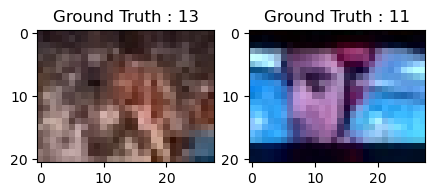

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

## Hacemos el One-hot Encoding para la red

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 13
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Creamos el Set de Entrenamiento y Validación

In [ ]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(98723, 21, 28, 3) (24681, 21, 28, 3) (98723, 20) (24681, 20)


# Creamos el modelo de CNN

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(negative_slope=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))

/home/luisjdominguezp/anaconda3/envs/percepcion/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1722817474.233298  773446 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1722817474.265185  773446 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:172281

In [ ]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 21, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 21, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       157,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,284 (622.20 KB)

 Trainable params: 159,284 (622.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR, weight_decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [ ]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
#sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/6


I0000 00:00:1722817481.519142  775534 service.cc:146] XLA service 0x7aff40001ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1722817481.519162  775534 service.cc:154]   StreamExecutor device (0): NVIDIA T500, Compute Capability 7.5
2024-08-04 18:24:41.546289: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-04 18:24:41.588947: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  69/1543 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0522 - loss: 3.0238

I0000 00:00:1722817482.822723  775534 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1543/1543 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0760 - loss: 2.9636 - val_accuracy: 0.1961 - val_loss: 2.7398
Epoch 2/6
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1533 - loss: 2.7507 - val_accuracy: 0.2565 - val_loss: 2.4845
Epoch 3/6
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1939 - loss: 2.5659 - val_accuracy: 0.2869 - val_loss: 2.2819
Epoch 4/6
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2273 - loss: 2.4136 - val_accuracy: 0.3005 - val_loss: 2.1180
Epoch 5/6
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2459 - loss: 2.2904 - val_accuracy: 0.3249 - val_loss: 1.9918
Epoch 6/6
1543/1543 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2644 - loss: 2.1958 - val_accuracy: 0.3430 - val_loss: 1.8989


In [ ]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
#sport_model.save("sports_mnist.h5py")
sport_model.save("sports_mnist.keras")

# Evaluamos la red

In [ ]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

965/965 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3374 - loss: 1.8983


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.8947256803512573
Test accuracy: 0.3403993248939514


In [ ]:
accuracy = sport_train.history['acc']
val_accuracy = sport_train.history['val_acc']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'acc'

In [ ]:
predicted_classes2 = sport_model.predict(test_X)

965/965 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step


In [ ]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [ ]:
predicted_classes.shape, test_Y.shape

((30852,), (30852,))

# Aprendamos de los errores: Qué mejorar

Found 10502 correct labels


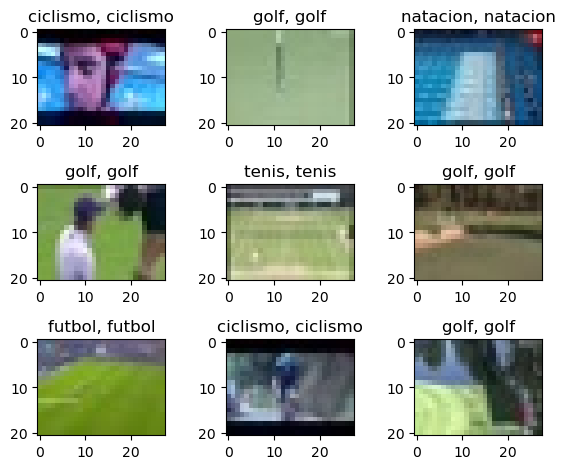

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[correct]],
                                                    deportes[test_Y[correct]]))

    plt.tight_layout()

Found 20350 incorrect labels


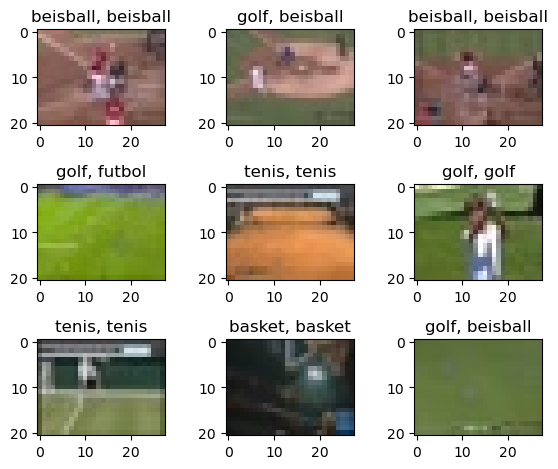

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(deportes[predicted_classes[incorrect]],
                                                    deportes[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.45      0.73      0.56      1007
     Class 1       0.23      0.11      0.15      1825
     Class 2       0.46      0.97      0.62      1701
     Class 3       0.33      0.48      0.39      1547
     Class 4       0.40      0.15      0.22       998
     Class 5       0.45      0.61      0.52      1477
     Class 6       0.44      0.12      0.19      1105
     Class 7       0.22      0.10      0.14      1850
     Class 8       0.16      0.03      0.05      1838
     Class 9       0.00      0.00      0.00      1559
    Class 10       0.36      0.02      0.03       988
    Class 11       0.46      0.36      0.40      1501
    Class 12       0.34      0.49      0.40      1486
    Class 13       0.42      0.39      0.40      1730
    Class 14       0.32      0.05      0.08      1526
    Class 15       0.21      0.76      0.33      1984
    Class 16       0.29      0.42      0.35      1453
    Class 17       0.36    

/home/luisjdominguezp/anaconda3/envs/percepcion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luisjdominguezp/anaconda3/envs/percepcion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/luisjdominguezp/anaconda3/envs/percepcion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

# Prediccion de una nueva imagen

In [ ]:
from skimage.transform import resize

images=[]
# AQUI ESPECIFICAMOS UNAS IMAGENES
filenames = ['sportimages/golf/golf_0113.jpg']

for filepath in filenames:
    image = plt.imread(filepath,0)
    image_resized = resize(image, (21, 28),anti_aliasing=True,clip=False,preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
test_X = X.astype('float32')
test_X = test_X / 255.

predicted_classes = sport_model.predict(test_X)

for i, img_tagged in enumerate(predicted_classes):
    print(filenames[i], deportes[img_tagged.tolist().index(max(img_tagged))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
sportimages/golf/golf_0113.jpg golf
